In [39]:
# prompt: git clone
!git clone https://github.com/zclawr/rpg-sentiment-analysis.git

fatal: destination path 'rpg-sentiment-analysis' already exists and is not an empty directory.


# Data Exploration

In [ ]:
!cd ./rpg-sentiment-analysis/
!ls

rpg-sentiment-analysis	sample_data


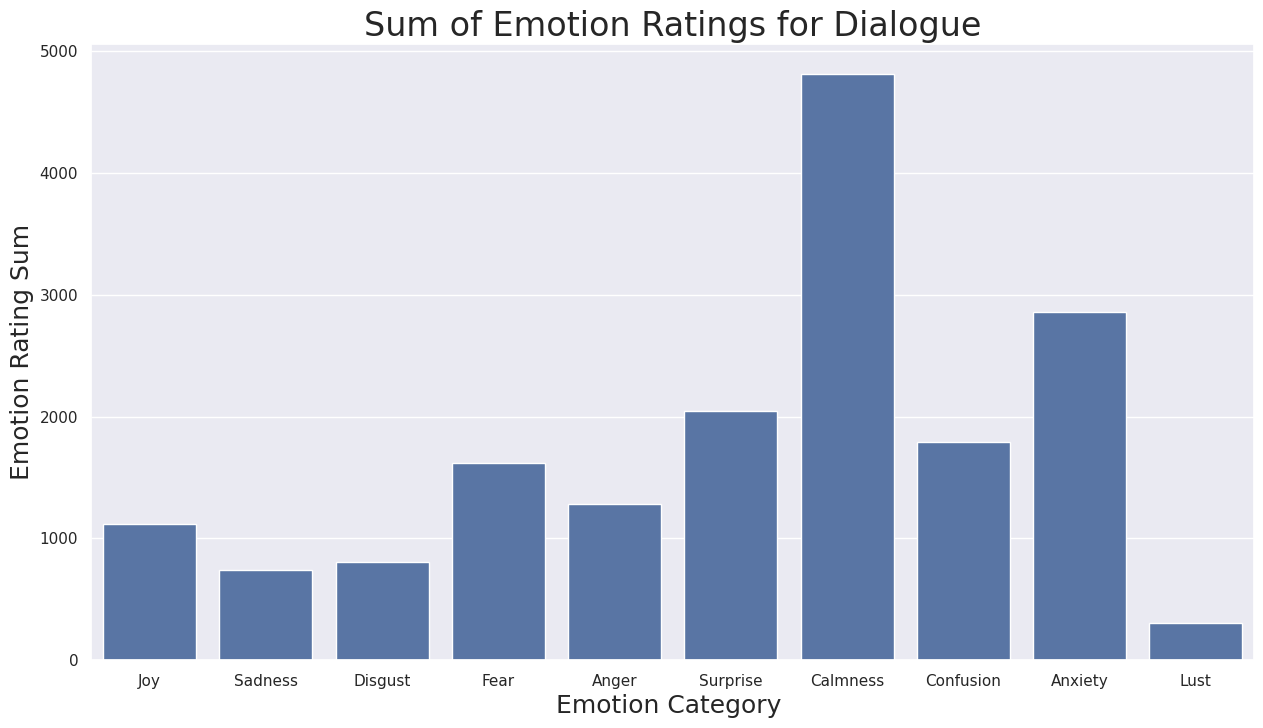

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./rpg-sentiment-analysis/manual_labels.csv')
df.head()

#Need the following:
# num observations
# details about data distributions
# scales
# missing data
# column descriptions
# Explain preprocessing in README

df_emotions = df.drop(columns=['Line', 'Movie', 'Character', 'Dialogue'])
df_emotions.head()
categories = list(df_emotions.columns.values)

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

df_emotions['Joy'] = pd.to_numeric(df_emotions['Joy'], errors='coerce')
df_emotions['Sadness'] = pd.to_numeric(df_emotions['Sadness'], errors='coerce')
df_emotions['Disgust'] = pd.to_numeric(df_emotions['Disgust'], errors='coerce')
df_emotions['Fear'] = pd.to_numeric(df_emotions['Fear'], errors='coerce')
df_emotions['Anger'] = pd.to_numeric(df_emotions['Anger'], errors='coerce')
df_emotions['Surprise'] = pd.to_numeric(df_emotions['Surprise'], errors='coerce')
df_emotions['Calmness'] = pd.to_numeric(df_emotions['Calmness'], errors='coerce')
df_emotions['Confusion'] = pd.to_numeric(df_emotions['Confusion'], errors='coerce')
df_emotions['Anxiety'] = pd.to_numeric(df_emotions['Anxiety'], errors='coerce')
df_emotions['Lust'] = pd.to_numeric(df_emotions['Lust'], errors='coerce')

axes = sns.barplot(x=categories, y=df_emotions.sum().values)

plt.title("Sum of Emotion Ratings for Dialogue", fontsize=24)
plt.ylabel('Emotion Rating Sum', fontsize=18)
plt.xlabel('Emotion Category ', fontsize=18)

plt.show()

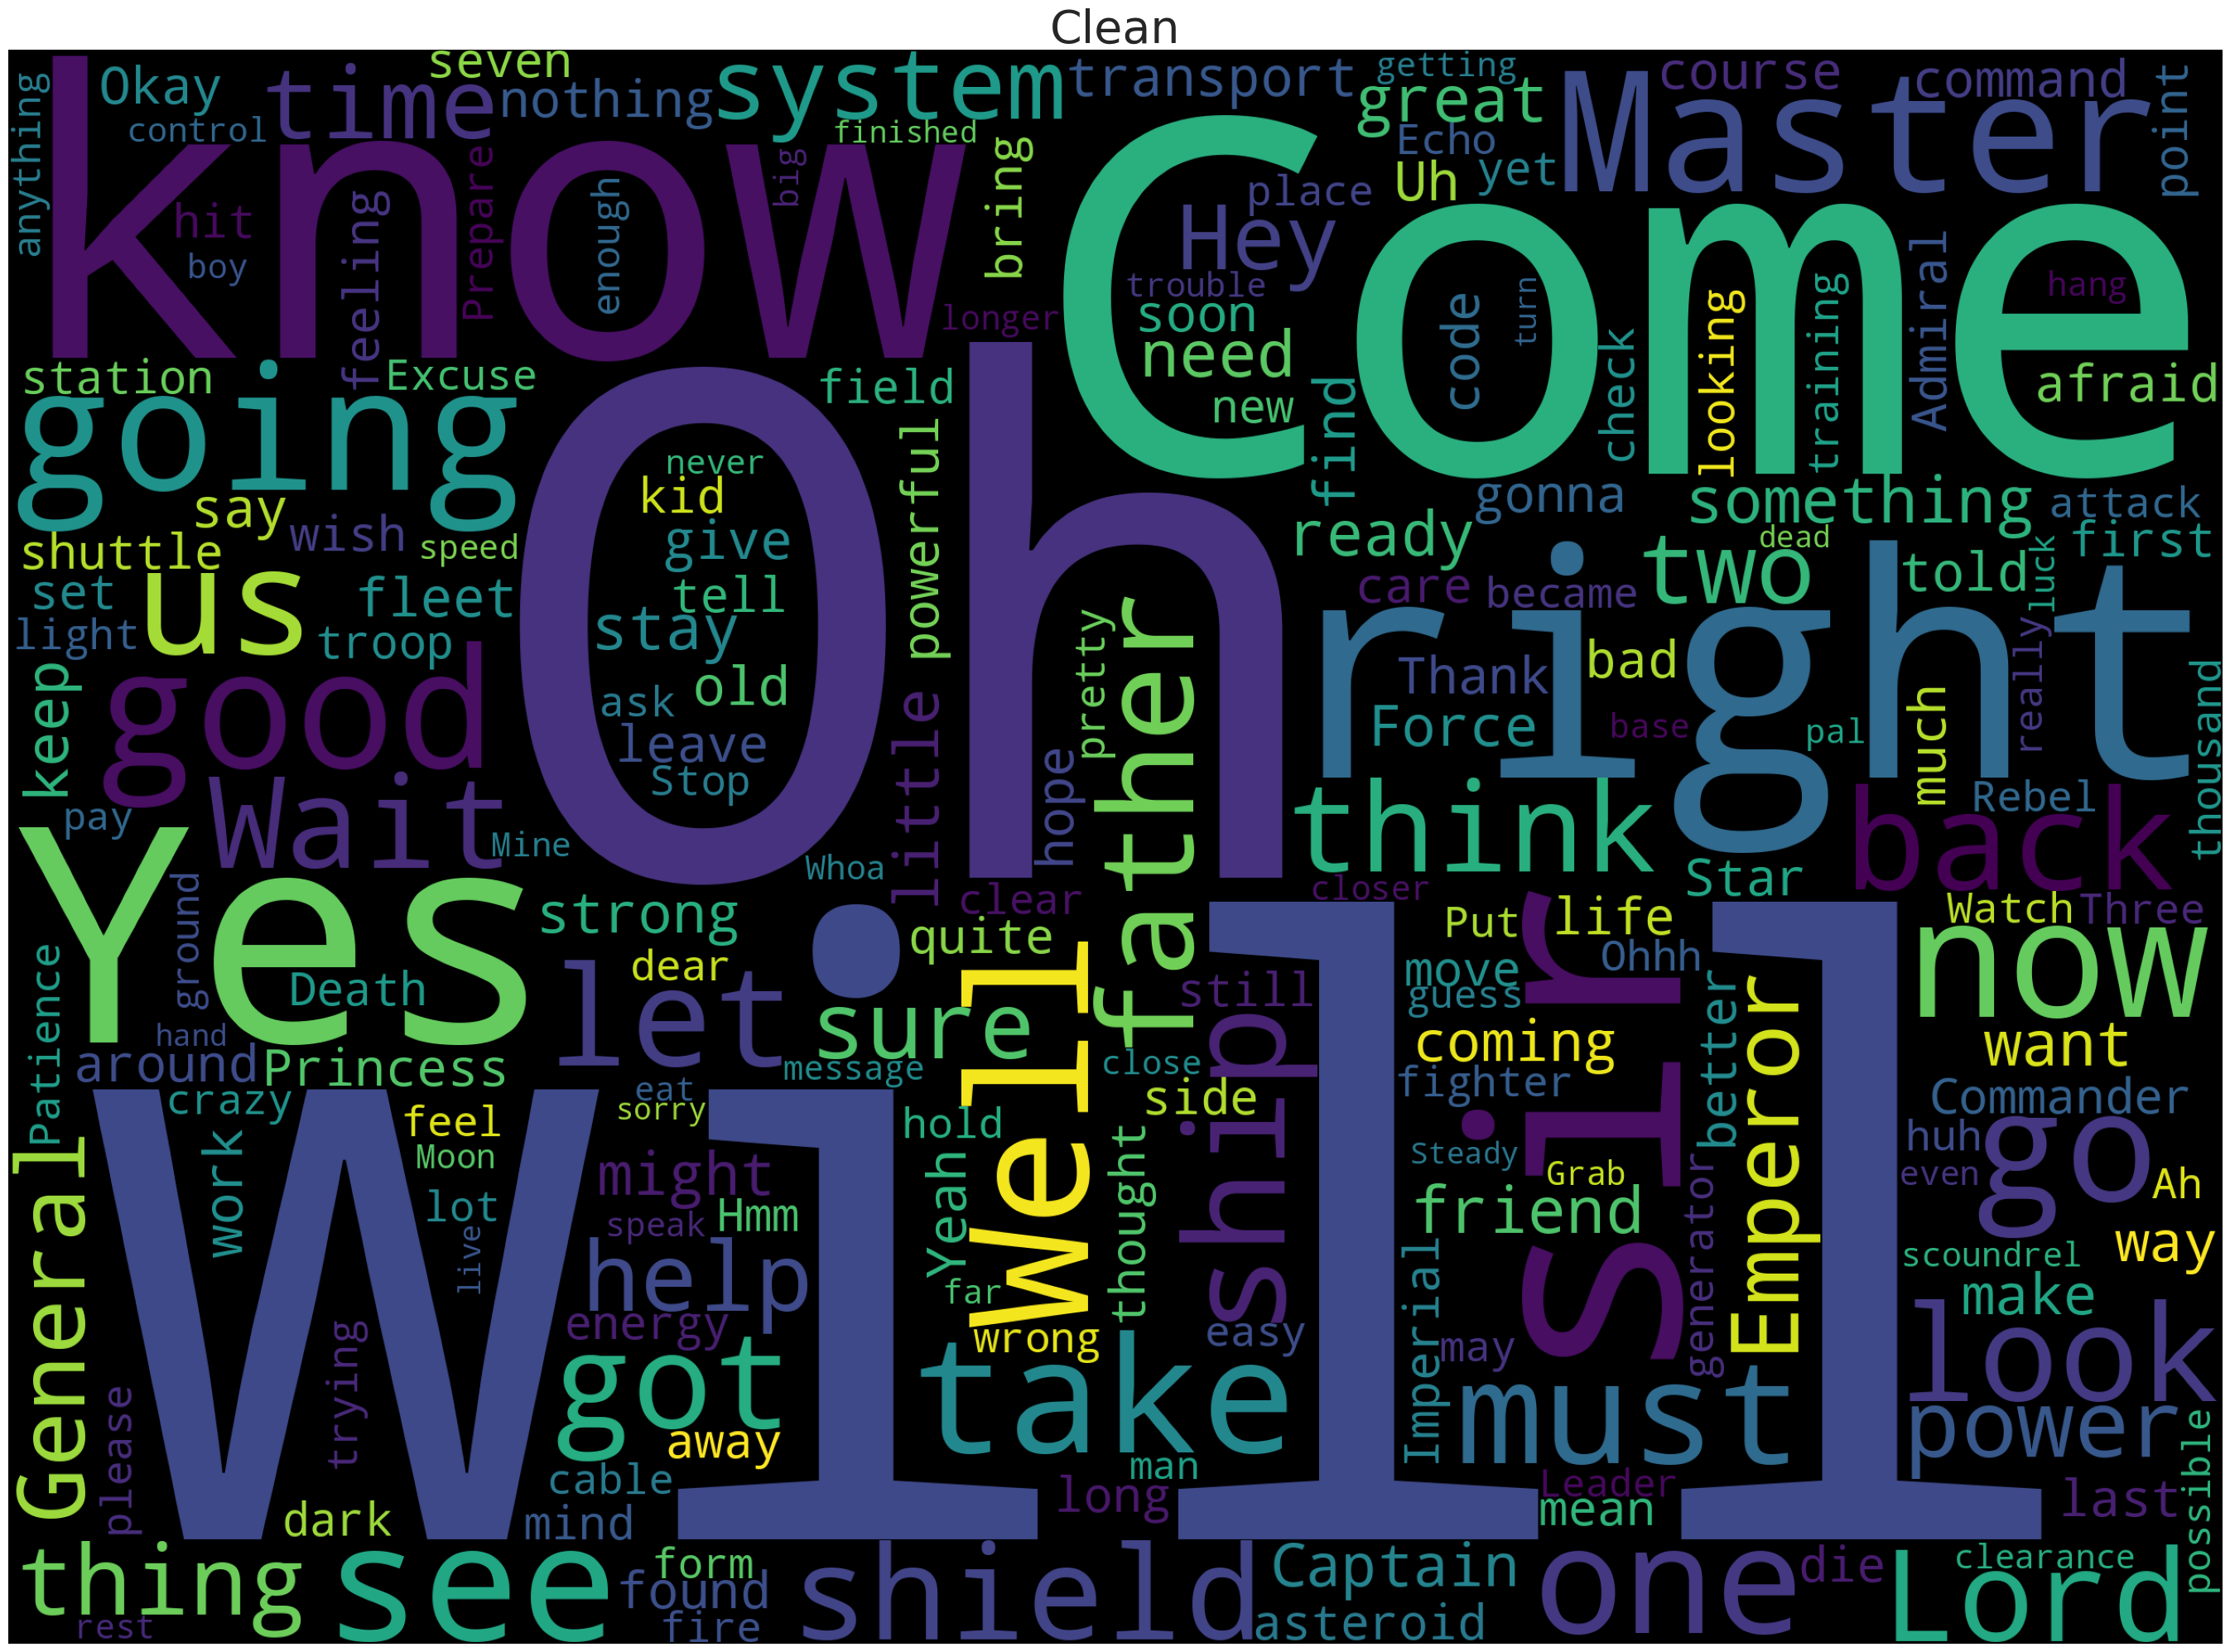

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))
# clean
subset = df_emotions
stopwords = ['Luke', 'Solo', 'Jabba', 'Yoda', 'Han', 'Wookiee', 'Skywalker', 'Chewie', 'Dagobah', 'Hutt', 'Artoo', 'Threepio', 'Vader', 'Lando', 'Leia', 'Jedi', 'Ben', 'Rouge', 'droid', 'Dack'] + list(STOPWORDS)
text = df['Dialogue'].values
cloud_toxic = WordCloud(
                          stopwords=stopwords,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)


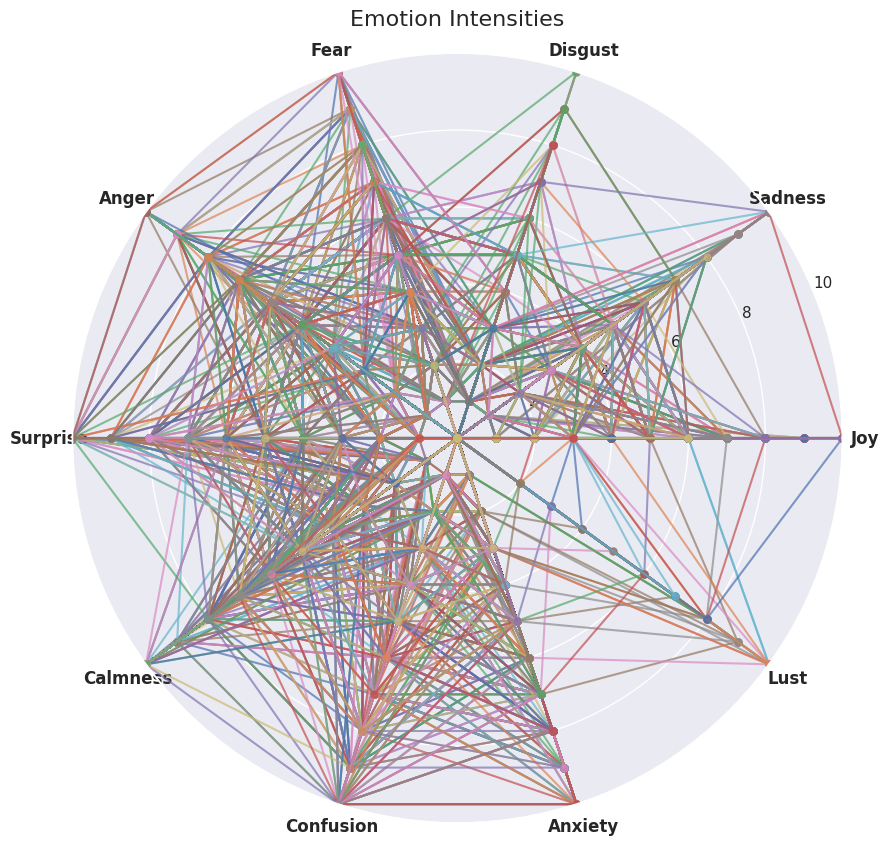

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./rpg-sentiment-analysis/combined_labels.csv')
df_emotions = df.drop(columns=['Line', 'Movie', 'Character', 'Dialogue'])
df_emotions = df_emotions.dropna()

for col in df_emotions.columns:
    df_emotions[col] = pd.to_numeric(df_emotions[col], errors='coerce')
num_emotions = len(list(df_emotions.columns))

angles = np.linspace(0, 2 * np.pi, num_emotions, endpoint=False).tolist()
plt.figure(figsize=(10, 10), dpi=100)
ax = plt.subplot(111, polar=True)

for i in range(len(df)):
    values = df_emotions.iloc[i].values.tolist()
    values += values[:1]
    angle_values = angles + angles[:1]
    ax.plot(angle_values, values, marker='o', linestyle='-', markersize=5, alpha=0.7, label=f'Observation {i+1}')

# showing the emotions around the circle
angles += angles[:1]
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_ylim(0, 10)

plt.title("Emotion Intensities", size=16, pad=20)
plt.show()

Shape of X: (870, 1551)
Shape of y: (870, 10)


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
866,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
867,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
868,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
869,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


<Figure size 1500x800 with 0 Axes>

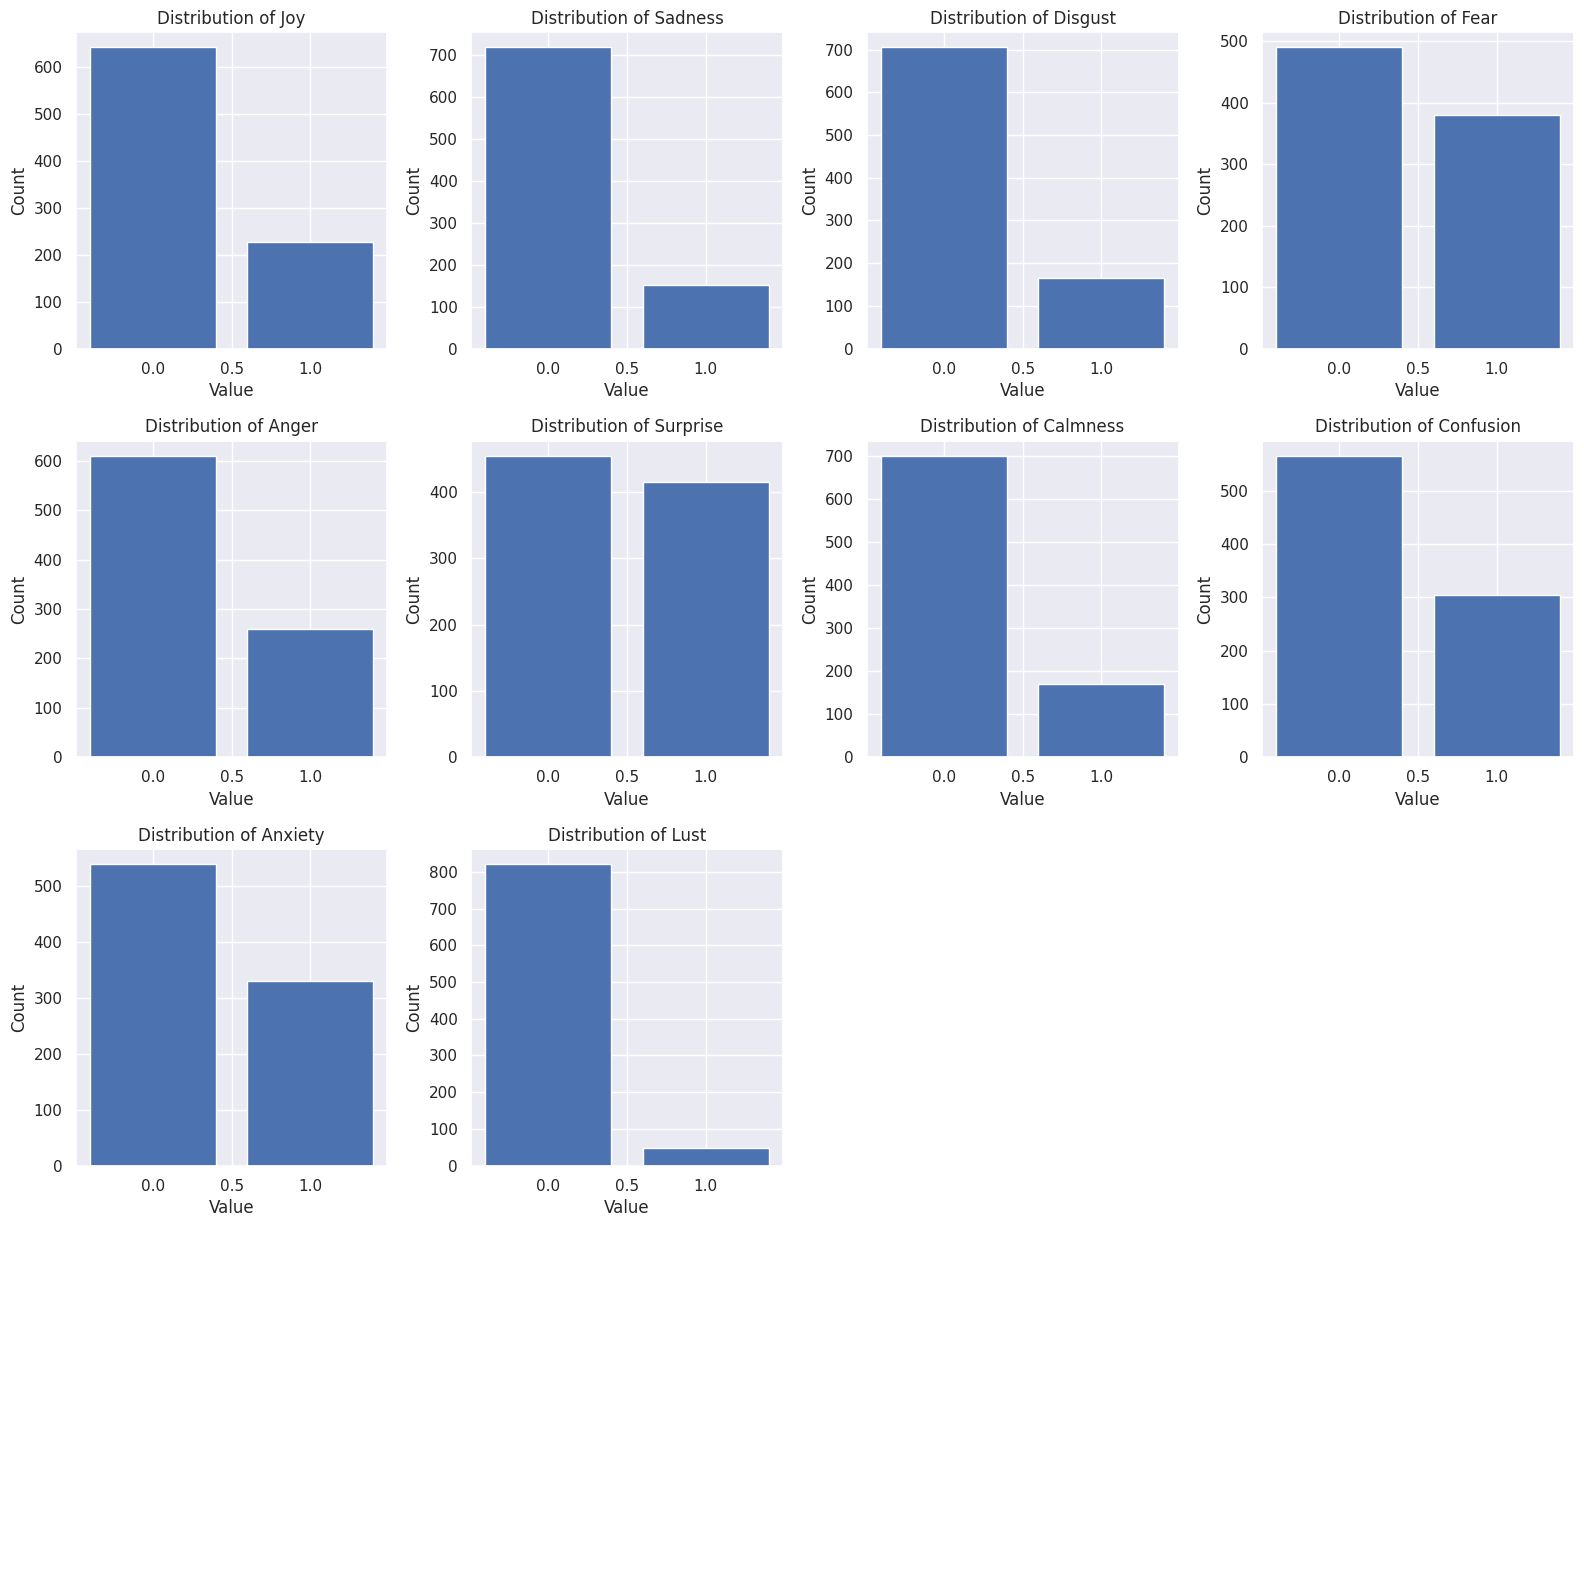

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./rpg-sentiment-analysis/manual_labels.csv')
df.head()

df_emotions = df.drop(columns=['Line', 'Movie', 'Character', 'Dialogue'])
df_emotions.head()
categories = list(df_emotions.columns.values)

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

df_emotions['Joy'] = pd.to_numeric(df_emotions['Joy'], errors='coerce')
df_emotions['Sadness'] = pd.to_numeric(df_emotions['Sadness'], errors='coerce')
df_emotions['Disgust'] = pd.to_numeric(df_emotions['Disgust'], errors='coerce')
df_emotions['Fear'] = pd.to_numeric(df_emotions['Fear'], errors='coerce')
df_emotions['Anger'] = pd.to_numeric(df_emotions['Anger'], errors='coerce')
df_emotions['Surprise'] = pd.to_numeric(df_emotions['Surprise'], errors='coerce')
df_emotions['Calmness'] = pd.to_numeric(df_emotions['Calmness'], errors='coerce')
df_emotions['Confusion'] = pd.to_numeric(df_emotions['Confusion'], errors='coerce')
df_emotions['Anxiety'] = pd.to_numeric(df_emotions['Anxiety'], errors='coerce')
df_emotions['Lust'] = pd.to_numeric(df_emotions['Lust'], errors='coerce')

df_classification = df.copy()

for col in df_classification.columns[4:]:
    df_classification[col] = np.where(df_classification[col] > 0, 1, 0)

df = df_classification.copy()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Dialogue'][1:]).toarray()
y = df[['Joy', 'Sadness', 'Disgust', 'Fear', 'Anger', 'Surprise', 'Calmness', 'Confusion', 'Anxiety', 'Lust']].iloc[1:]
y = y.apply(pd.to_numeric, errors='coerce').dropna()

if X.shape[0] > y.shape[0]:
    X = X[:y.shape[0], :]
elif y.shape[0] > X.shape[0]:
    y = y.iloc[:X.shape[0], :]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

y = (y - y.min()) / (y.max() - y.min())
display(y)

rows = 4
cols = 4

num_plots = len(y.columns)

fig, axes = plt.subplots(rows, cols, figsize=(16, 16))

axes = axes.flatten()

for i, emotion in enumerate(y.columns):
    ax = axes[i]

    ax.bar(np.unique(y[emotion]), y[emotion].value_counts())
    ax.set_title(f'Distribution of {emotion}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Count')

for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# First Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# apply TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Dialogue'][1:]).toarray()
y = df[['Joy', 'Sadness', 'Disgust', 'Fear', 'Anger', 'Surprise', 'Calmness', 'Confusion', 'Anxiety', 'Lust']].iloc[1:]
y = y.apply(pd.to_numeric, errors='coerce').dropna()

# ensure the shapes are the same
if X.shape[0] > y.shape[0]:
    X = X[:y.shape[0], :]
elif y.shape[0] > X.shape[0]:
    y = y.iloc[:X.shape[0], :]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# min-max normalization so that output is between 0 and 1
y = (y - y.min()) / (y.max() - y.min())
display(y.describe())

Shape of X: (870, 1551)
Shape of y: (870, 10)


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,0.262069,0.174713,0.189655,0.436782,0.298851,0.477011,0.805747,0.349425,0.619540,0.056322
std,0.440013,0.379940,0.392254,0.496273,0.458018,0.499759,0.395852,0.477063,0.485779,0.230675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# fitting model
rf_model = MultiOutputRegressor(RandomForestRegressor(random_state=42))
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

predicted_df = pd.DataFrame(y_test_pred, columns=y.columns)

In [ ]:
# model evaluation

# Perform k-fold cross-validation (e.g., 5-fold)
from sklearn.model_selection import cross_val_score

k = 5
mse_scores = cross_val_score(rf_model, X, y, cv=k, scoring='neg_mean_squared_error')
mse_scores = -mse_scores
print(f"MSE scores for each fold: {mse_scores}")
print(f"Mean MSE: {np.mean(mse_scores)}")
print(f"Standard Deviation of MSE: {np.std(mse_scores)}")

# show the training mse
train_mse = mean_squared_error(y_train, y_train_pred, multioutput='raw_values')
train_mse_results = dict(zip(y.columns, train_mse))

# show the testing mse
test_mse = mean_squared_error(y_test, y_test_pred, multioutput='raw_values')
test_mse_results = dict(zip(y.columns, test_mse))

eval_df = pd.DataFrame({'Training MSE': train_mse_results, 'Testing MSE': test_mse_results}, index=y.columns)
eval_df['Which is Greater'] = eval_df.apply(lambda row: row.idxmax(), axis=1)
display(eval_df)

MSE scores for each fold: [0.12032912 0.10202786 0.08477991 0.0683645  0.09883799]
Mean MSE: 0.09486787516319949
Standard Deviation of MSE: 0.017432716497048282


,Training MSE,Testing MSE,Which is Greater
Joy,0.014913,0.063421,Testing MSE
Sadness,0.007435,0.046829,Testing MSE
Disgust,0.006578,0.034534,Testing MSE
Fear,0.012238,0.096060,Testing MSE
Anger,0.011528,0.103430,Testing MSE
Surprise,0.017985,0.120433,Testing MSE
Calmness,0.021697,0.199642,Testing MSE
Confusion,0.017411,0.140069,Testing MSE
Anxiety,0.019745,0.136708,Testing MSE
Lust,0.004706,0.024377,Testing MSE


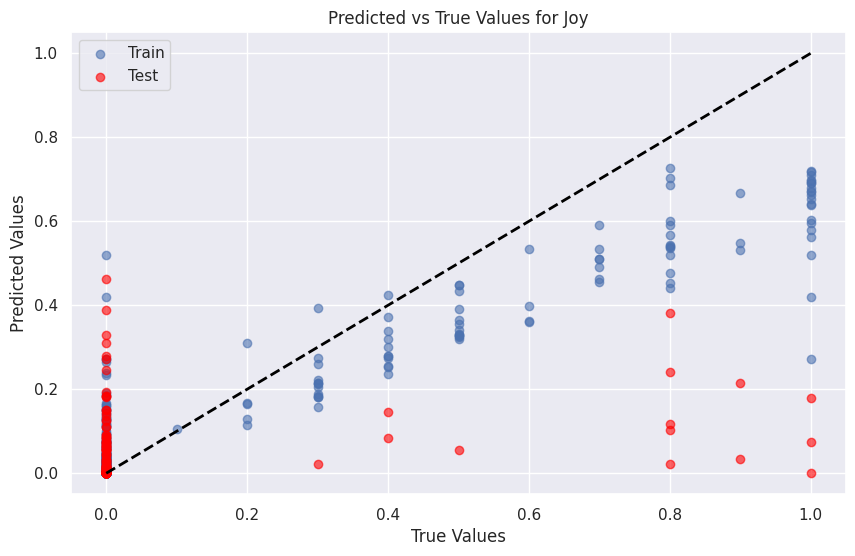

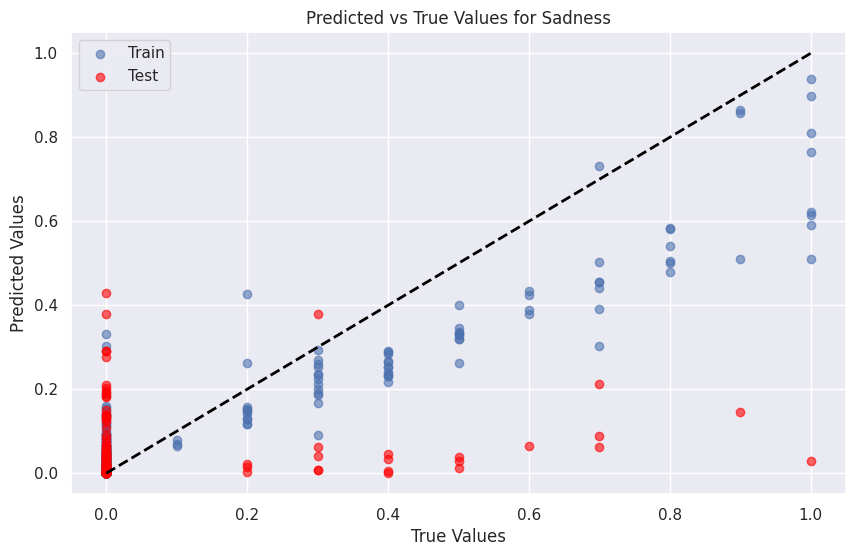

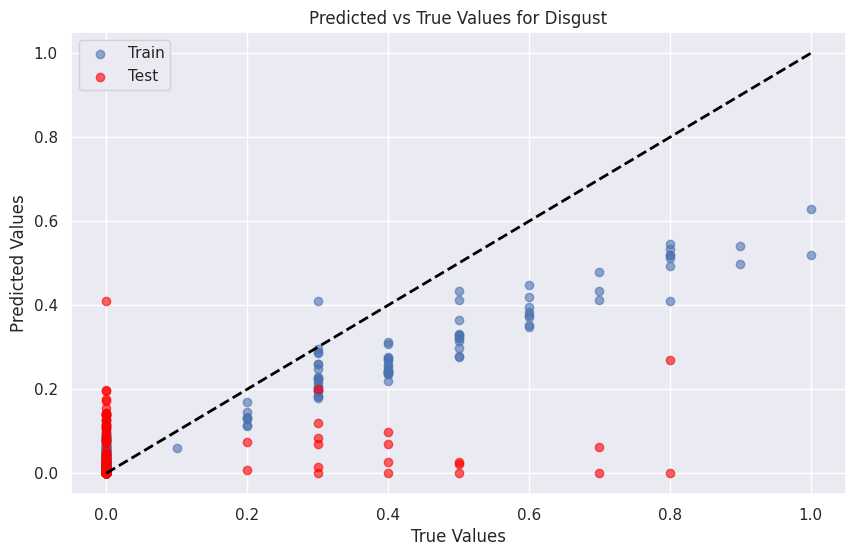

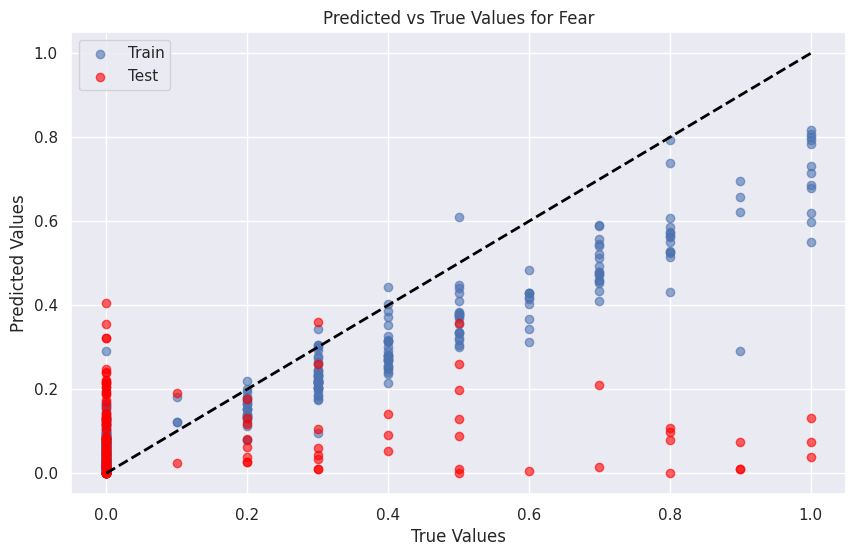

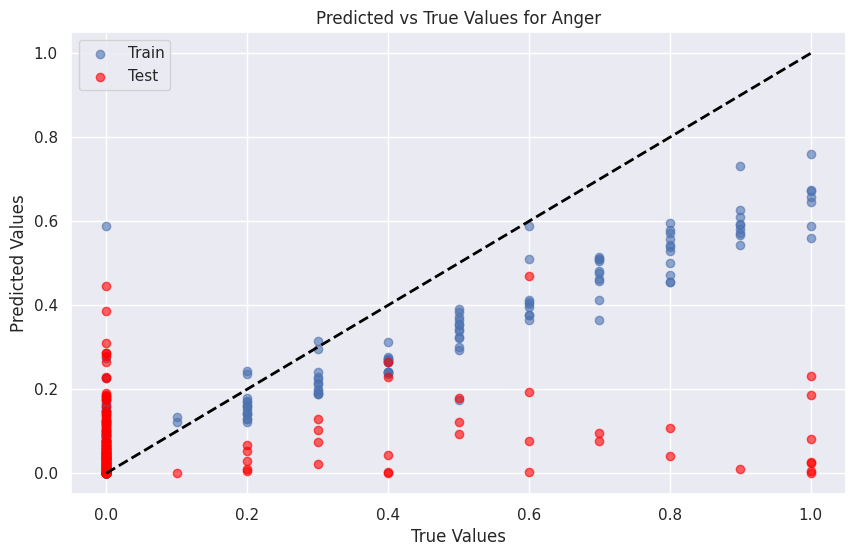

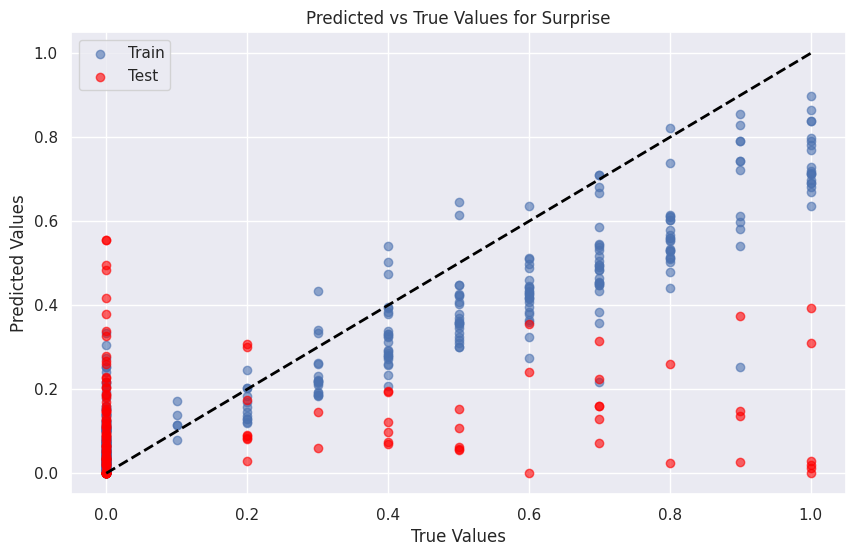

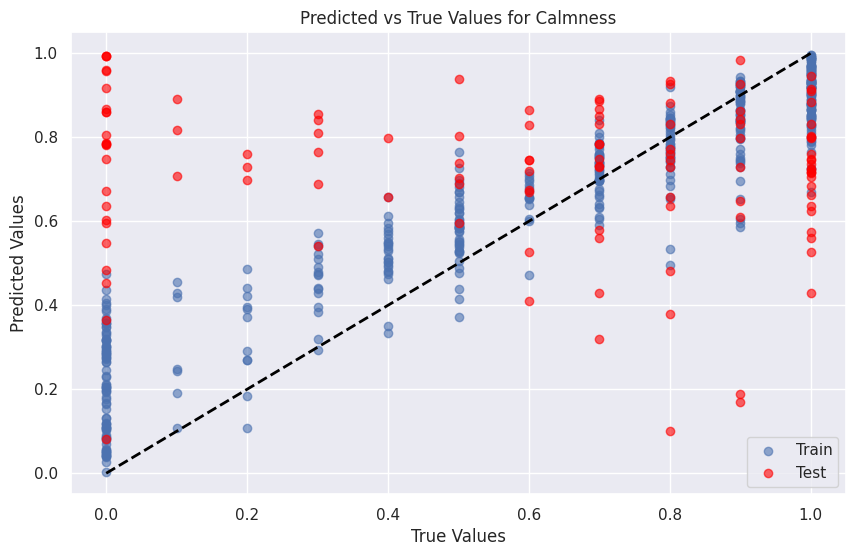

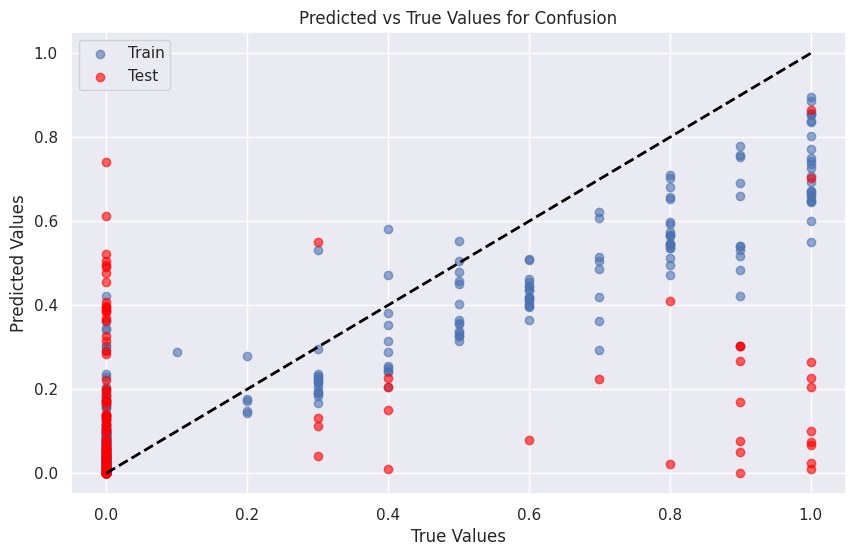

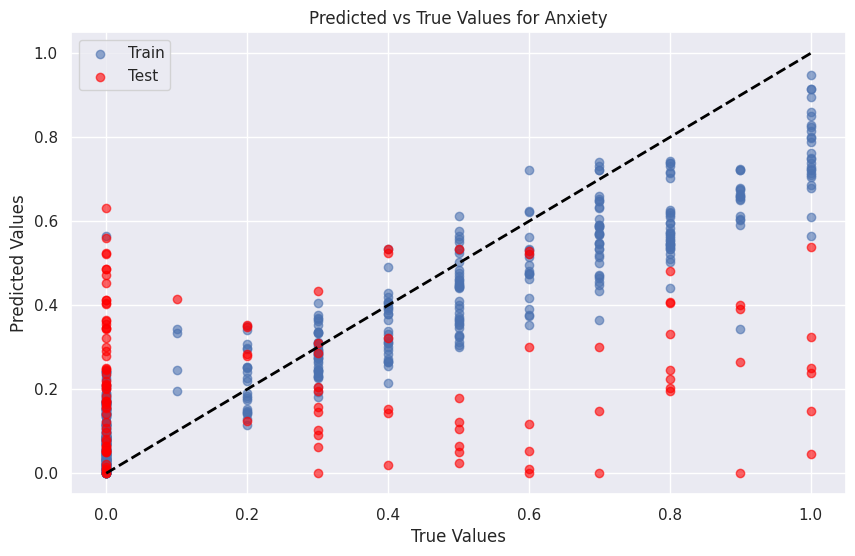

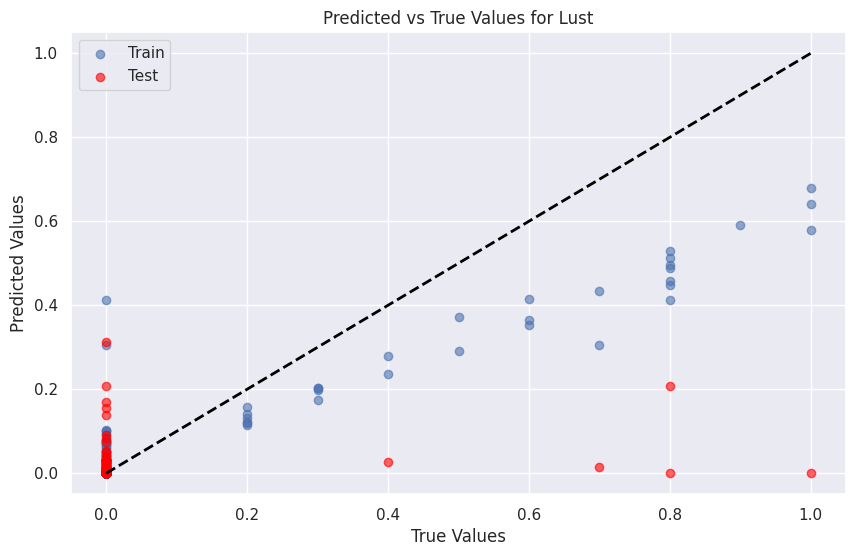

In [ ]:
import matplotlib.pyplot as plt

# Loop through each output variable
for i, column in enumerate(y_train.columns):
    plt.figure(figsize=(10, 6))

    # Train predictions
    plt.scatter(y_train[column], rf_model.predict(X_train)[:, i], label="Train", alpha=0.6)

    # Test predictions
    plt.scatter(y_test[column], rf_model.predict(X_test)[:, i], label="Test", alpha=0.6, color="red")

    # y=x line
    plt.plot([y_train[column].min(), y_train[column].max()],
             [y_train[column].min(), y_train[column].max()],
             color="black", linestyle="--", linewidth=2)

    plt.title(f"Predicted vs True Values for {column}")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.legend()
    plt.show()


In [ ]:
new_sentence = ["Oh!"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = rf_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

print("before thresholding:")
display(predicted_df)
print()

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

print("after thresholding:")
display(predicted_df)

before thresholding:


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
0,0.36,0.0,0.048,0.181,0.0,0.732,0.295,0.033,0.275,0.0



after thresholding:


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
0,0.235589,0.0,0.0,0.005411,0.0,0.496668,0.0,0.0,0.0,0.0


In [ ]:
'''
Oversampling can help improve model performance, especially in cases where you have imbalanced data—meaning
that certain emotion intensities or emotions (e.g., high levels of "Fear" or "Calmness") are underrepresented compared to others.
'''

# implement oversampling

'\nOversampling can help improve model performance, especially in cases where you have imbalanced data—meaning\nthat certain emotion intensities or emotions (e.g., high levels of "Fear" or "Calmness") are underrepresented compared to others.\n'

# Second Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

# apply TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Dialogue'][1:]).toarray()
y = df[['Joy', 'Sadness', 'Disgust', 'Fear', 'Anger', 'Surprise', 'Calmness', 'Confusion', 'Anxiety', 'Lust']].iloc[1:]
y = y.apply(pd.to_numeric, errors='coerce').dropna()

# ensure the shapes are the same
if X.shape[0] > y.shape[0]:
    X = X[:y.shape[0], :]
elif y.shape[0] > X.shape[0]:
    y = y.iloc[:X.shape[0], :]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# min-max normalization so that output is between 0 and 1
y = (y - y.min()) / (y.max() - y.min())
display(y.describe())

Shape of X: (870, 1551)
Shape of y: (870, 10)


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
count,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000,870.000000
mean,0.262069,0.174713,0.189655,0.436782,0.298851,0.477011,0.805747,0.349425,0.619540,0.056322
std,0.440013,0.379940,0.392254,0.496273,0.458018,0.499759,0.395852,0.477063,0.485779,0.230675
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor  # Import XGBoost Regressor

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# get the mean of each feature
mean_values = y_train.mean()
print(mean_values)

fit_params = {}
for col in y_test.columns:
    fit_params[f'eval_set_{col}'] = [(X_train, y_train[col]), (X_test, y_test[col])]

# Fitting model with XGBoost
xgb_model = MultiOutputRegressor(XGBRegressor(
    random_state=42,
    tree_method=""
))

'''
We want to use "exact" because we have a small dataset and we want to emphasize accuracy rather than speed
We specify a max_depth, introduce L2 regularization, and reduce learning rate from default 0.3 to 0.01 in order to mitigate overfitting
'''
for col in y_test.columns:
    xgb_model.fit(X_train, y_train, eval_set=fit_params[f'eval_set_{col}'], verbose=False) # Verbose=False to suppress output


# Making predictions
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

# Creating a DataFrame for predictions
predicted_df = pd.DataFrame(y_test_pred, columns=y.columns)

      Joy  Sadness  Disgust  Fear  Anger  Surprise  Calmness  Confusion  \
2465  0.0      0.0      0.0   0.3    0.4       0.0       0.5        0.0   
1562  0.1      0.0      0.0   0.0    0.0       0.3       0.6        0.1   
2470  0.0      0.0      0.3   0.2    0.0       0.0       0.5        0.0   
1514  0.0      0.1      0.0   0.4    0.0       0.0       0.5        0.0   
1134  0.0      0.0      0.0   0.0    0.0       0.6       0.8        0.7   

      Anxiety  Lust  
2465      0.4   0.0  
1562      0.0   0.0  
2470      0.3   0.0  
1514      0.3   0.0  
1134      0.3   0.0  
Joy          0.112159
Sadness      0.118012
Disgust      0.070383
Fear         0.250252
Anger        0.180373
Surprise     0.198940
Calmness     0.514127
Confusion    0.117205
Anxiety      0.314581
Lust         0.010999
dtype: float64
      Joy  Sadness  Disgust  Fear  Anger  Surprise  Calmness  Confusion  \
2465  0.0      0.0      0.0   0.3    0.4       0.0       0.5        0.0   
1562  0.1      0.0      0.0   0.

KeyboardInterrupt: 

In [ ]:
# model evaluation

# Perform k-fold cross-validation (e.g., 5-fold)
from sklearn.model_selection import cross_val_score

# k = 5
# mse_scores = cross_val_score(xgb_model, X, y, cv=k, scoring='neg_mean_squared_error')
# mse_scores = -mse_scores
# print(f"MSE scores for each fold: {mse_scores}")
# print(f"Mean MSE: {np.mean(mse_scores)}")
# print(f"Standard Deviation of MSE: {np.std(mse_scores)}")

# show the training mse
train_mse = mean_squared_error(y_train, y_train_pred, multioutput='raw_values')
train_mse_results = dict(zip(y.columns, train_mse))

# show the testing mse
test_mse = mean_squared_error(y_test, y_test_pred, multioutput='raw_values')
test_mse_results = dict(zip(y.columns, test_mse))

eval_df = pd.DataFrame({'Training MSE': train_mse_results, 'Testing MSE': test_mse_results}, index=y.columns)
eval_df['Which is Greater'] = eval_df.apply(lambda row: row.idxmax(), axis=1)
display(eval_df)

,Training MSE,Testing MSE,Which is Greater
Joy,0.011085,0.040892,Testing MSE
Sadness,0.010967,0.044846,Testing MSE
Disgust,0.006219,0.042235,Testing MSE
Fear,0.020542,0.069263,Testing MSE
Anger,0.023036,0.083647,Testing MSE
Surprise,0.021687,0.070053,Testing MSE
Calmness,0.019577,0.054687,Testing MSE
Confusion,0.012998,0.054464,Testing MSE
Anxiety,0.021706,0.072303,Testing MSE
Lust,0.000017,0.014875,Testing MSE


In [ ]:
from matplotlib import pyplot as plt
from sklearn.model_selection import learning_curve

new_sentence = ["Stay away from me! Get back!"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

print("before thresholding:")
#display(predicted_df)
print()

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values

print("after thresholding:")
display(predicted_df)
print()

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

for i in range(len(y_test.columns)):
  results = xgb_model.estimators_[i].evals_result()
  # # plot learning curves
  plt.plot(results['validation_0']['rmse'], label='train')
  plt.plot(results['validation_1']['rmse'], label='test')
  # show the legend
  plt.legend()
  # show the plot
  plt.title(f"Learning Curve for {y_test.columns[i]}")
  #label axes with RMSE
  plt.xlabel('Number of Epochs')
  plt.ylabel('RMSE')
  plt.show()

NotFittedError: This MultiOutputRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
'''
We have 10 emotions, but this process for finding predictions of correct and FP and FN from the test dataset
is the same for each emotion. In this case, we will be using the "Surprise" emotion.
'''

# Here is an example of a correct prediction of surprise. This line is rated 20 for surprise.
'''
30,SW_EpisodeVI,THREEPIO,"Oh, my! Die Wanna Wauaga. We -- we bring a message to your master, Jabba the Hutt.",0,0,2,5,0,10,0,0,7,0
'''

new_sentence = ["Oh, my! Die Wanna Wauaga. We -- we bring a message to your master, Jabba the Hutt."]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

Emotion with Highest Value:
0    Surprise
dtype: object


In [ ]:
# Here is an example of a False Negative prediction of surprise. This is the line. It is rated 10 for surprise.:
'''
41,SW_EpisodeVI,THREEPIO,What did he say?,0,0,0,10,0,10,0,10,10,0
'''

new_sentence = ["What did he say?"]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

Emotion with Highest Value:
0    Confusion
dtype: object


In [ ]:
# Here is an example of a False Positive prediction of surprise. This is the line. It is rated 0 for surprise.:
'''
52,SW_EpisodeVI,THREEPIO,"Oh. Well, yes.",10,0,0,0,0,4,0,3,4,0
'''

new_sentence = ["Oh. Well, yes."]

new_sentence_tfidf = vectorizer.transform(new_sentence)
predicted_emotions = xgb_model.predict(new_sentence_tfidf)
predicted_df = pd.DataFrame(predicted_emotions, columns=y.columns)

# --thresholding--
# subtract the mean to accentuate stuff; above the mean implies emotion is more apparent on average
predicted_df = predicted_df - mean_values
# if the value is <0, just set it equal to 0
predicted_df[predicted_df < 0] = 0

# print the emotion with the highest values in predicted_df
print("Emotion with Highest Value:")
print(predicted_df.idxmax(axis=1))

Emotion with Highest Value:
0    Surprise
dtype: object


# Third Model

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

df = pd.read_csv('./rpg-sentiment-analysis/manual_labels.csv')
df.head()

df_emotions = df.drop(columns=['Line', 'Movie', 'Character', 'Dialogue'])
df_emotions.head()
categories = list(df_emotions.columns.values)

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

df_emotions['Joy'] = pd.to_numeric(df_emotions['Joy'], errors='coerce')
df_emotions['Sadness'] = pd.to_numeric(df_emotions['Sadness'], errors='coerce')
df_emotions['Disgust'] = pd.to_numeric(df_emotions['Disgust'], errors='coerce')
df_emotions['Fear'] = pd.to_numeric(df_emotions['Fear'], errors='coerce')
df_emotions['Anger'] = pd.to_numeric(df_emotions['Anger'], errors='coerce')
df_emotions['Surprise'] = pd.to_numeric(df_emotions['Surprise'], errors='coerce')
df_emotions['Calmness'] = pd.to_numeric(df_emotions['Calmness'], errors='coerce')
df_emotions['Confusion'] = pd.to_numeric(df_emotions['Confusion'], errors='coerce')
df_emotions['Anxiety'] = pd.to_numeric(df_emotions['Anxiety'], errors='coerce')
df_emotions['Lust'] = pd.to_numeric(df_emotions['Lust'], errors='coerce')

df_classification = df.copy()

for col in df_classification.columns[4:]:
    df_classification[col] = np.where(df_classification[col] > 0, 1, 0)

df = df_classification.copy()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Dialogue'][1:]).toarray()
y = df[['Joy', 'Sadness', 'Disgust', 'Fear', 'Anger', 'Surprise', 'Calmness', 'Confusion', 'Anxiety', 'Lust']].iloc[1:]
y = y.apply(pd.to_numeric, errors='coerce').dropna()

if X.shape[0] > y.shape[0]:
    X = X[:y.shape[0], :]
elif y.shape[0] > X.shape[0]:
    y = y.iloc[:X.shape[0], :]
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

y = (y - y.min()) / (y.max() - y.min())
display(y)

Shape of X: (870, 1551)
Shape of y: (870, 10)


,Joy,Sadness,Disgust,Fear,Anger,Surprise,Calmness,Confusion,Anxiety,Lust
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
866,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
867,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
868,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
869,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


<Figure size 1500x800 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, accuracy_score
import xgboost as xgb
from imblearn.over_sampling import SMOTE

# ... (rest of your code from the previous cell)

models_hp = []
emotions = ['Calmness', 'Confusion', 'Anxiety', 'Lust']
for emotion in emotions:
    print(f"Training model for emotion: {emotion}")

    # Prepare data for the current emotion
    y_emotion = y[emotion]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_emotion, test_size=0.2, random_state=21)

    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Define the parameter grid for grid search
    param_grid = {
        'learning_rate': [0.005, 0.01, 0.05],
        'reg_lambda': [1, 5, 10],
        'max_depth': [3,6,9]
    }

    # Create and train an XGBoost classifier
    model = xgb.XGBClassifier(
        tree_method='hist',
        objective='binary:logistic',
        eval_metric='logloss',
        n_estimators=1000,
        early_stopping_rounds=10
    )

    # Use GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(model, param_grid, scoring='recall', cv=3, n_jobs=-1)  # Use 3-fold cross-validation
    grid_search.fit(X_train_resampled, y_train_resampled, verbose=2, eval_set=[(X_train_resampled, y_train_resampled), (X_test, y_test)])

    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    models_hp.append(best_model)
    print(f"Best hyperparameters for {emotion}: {grid_search.best_params_}")

    # Evaluate the model (optional)
    yhat = best_model.predict(X_test)
    score = accuracy_score(y_test, yhat)
    print('Accuracy: %.3f' % score)

    # ... (rest of your code for loss curve plotting, etc.)

Training model for emotion: Calmness
[0]	validation_0-logloss:0.68906	validation_1-logloss:0.68975
[2]	validation_0-logloss:0.68153	validation_1-logloss:0.68295
[4]	validation_0-logloss:0.67426	validation_1-logloss:0.67684
[6]	validation_0-logloss:0.66727	validation_1-logloss:0.67068
[8]	validation_0-logloss:0.66051	validation_1-logloss:0.66486
[10]	validation_0-logloss:0.65396	validation_1-logloss:0.65924
[12]	validation_0-logloss:0.64770	validation_1-logloss:0.65378
[14]	validation_0-logloss:0.64167	validation_1-logloss:0.64878
[16]	validation_0-logloss:0.63579	validation_1-logloss:0.64373
[18]	validation_0-logloss:0.63010	validation_1-logloss:0.63886
[20]	validation_0-logloss:0.62453	validation_1-logloss:0.63419
[22]	validation_0-logloss:0.61917	validation_1-logloss:0.62973
[24]	validation_0-logloss:0.61379	validation_1-logloss:0.62563
[26]	validation_0-logloss:0.60863	validation_1-logloss:0.62154
[28]	validation_0-logloss:0.60352	validation_1-logloss:0.61795
[30]	validation_0-loglo

In [ ]:
from sklearn.metrics import classification_report

models = []
reports = []
tuned_learning_rates = [0.01, 0.01, 0.01, 0.005, 0.01, 0.005, 0.01, 0.01, 0.005, 0.05]
tuned_max_depths = [9, 9, 9, 3, 9, 3, 9, 9, 9, 9]
tuned_lambdas = [5, 1, 1, 1, 10, 10, 1, 1, 10, 10]
i = 0

rows = 4
cols = 4
num_plots = len(y.columns)
fig, axes = plt.subplots(rows, cols, figsize=(16, 16))
axes = axes.flatten()

for emotion in df_emotions.columns:
    print(f"Training model for emotion: {emotion}")

    # Prepare data for the current emotion
    y_emotion = y[emotion]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_emotion, test_size=0.2, random_state=21)
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    print("Shape of X_resampled:", X_train_resampled.shape)
    print("Shape of y_resampled:", y_train_resampled.shape)
    # Create and train an XGBoost classifier
    model = xgb.XGBClassifier(
        learning_rate = tuned_learning_rates[i],
        max_depth = tuned_max_depths[i],
        reg_lambda = tuned_lambdas[i],
        tree_method = 'hist',
        objective = 'binary:logistic',
        eval_metric = 'logloss',
        n_estimators = 5000,
        early_stopping_rounds = 10
    )
    model.fit(X_train_resampled, y_train_resampled, verbose=0, eval_set=[(X_train_resampled, y_train_resampled),(X_test, y_test)])

    models.append(model)

    yhat = model.predict(X_test)
    report = classification_report(y_test, yhat)
    reports.append(report)
    print('Classification Report for' + emotion + ':')
    print(report)

    eval_history = model.evals_result()
    train_loss = eval_history['validation_0']['logloss']
    test_loss = eval_history['validation_1']['logloss']

    ax = axes[i]
    ax.plot(train_loss, label='Train Loss')
    ax.plot(test_loss, label='Test Loss')

    ax.set_xlabel('Epoch')
    ax.set_ylabel('Log Loss')
    ax.set_title(f'Loss Curve for {emotion}')
    ax.legend()

    i += 1

for j in range(num_plots, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Training model for emotion: Joy
Shape of X_resampled: (1036, 1551)
Shape of y_resampled: (1036,)
Classification Report forJoy:
              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       124
         1.0       0.29      0.20      0.24        50

    accuracy                           0.63       174
   macro avg       0.50      0.50      0.50       174
weighted avg       0.59      0.63      0.61       174

Training model for emotion: Sadness
Shape of X_resampled: (1158, 1551)
Shape of y_resampled: (1158,)
Classification Report forSadness:
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.86       139
         1.0       0.25      0.11      0.16        35

    accuracy                           0.75       174
   macro avg       0.53      0.51      0.51       174
weighted avg       0.69      0.75      0.71       174

Training model for emotion: Disgust
Shape of X_resampled: (1140, 1551)
Shape of y_re

In [43]:
from sklearn.metrics import classification_report

overall_report = ''
for i, report in enumerate(reports):
    overall_report += f"Classification Report for {df_emotions.columns[i]}:\n{report}\n"

print(overall_report)

Classification Report for Joy:
              precision    recall  f1-score   support

         0.0       0.71      0.81      0.76       124
         1.0       0.29      0.20      0.24        50

    accuracy                           0.63       174
   macro avg       0.50      0.50      0.50       174
weighted avg       0.59      0.63      0.61       174

Classification Report for Sadness:
              precision    recall  f1-score   support

         0.0       0.80      0.91      0.86       139
         1.0       0.25      0.11      0.16        35

    accuracy                           0.75       174
   macro avg       0.53      0.51      0.51       174
weighted avg       0.69      0.75      0.71       174

Classification Report for Disgust:
              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83       135
         1.0       0.13      0.05      0.07        39

    accuracy                           0.71       174
   macro avg       0.45    